# Exploring E-bay Car Sales Data
- This Data is taken from [Kaggle Competitions](https://www.kaggle.com/orgesleka/used-cars-database/data)

### Data Dictionary

> <font color=blue>**_dateCrawled_**</font> - When this ad was first crawled. All field-values are taken from this date.<br>
> <font color=blue>**_name_**</font> - Name of the car.<br>
> <font color=blue>**_seller_**</font> - Whether the seller is private or a dealer.<br>
> <font color=blue>**_offerType_**</font> - The type of listing<br>
> <font color=blue>**_price_**</font> - The price on the ad to sell the car.<br>
> <font color=blue>**_abtest_**</font> - Whether the listing is included in an A/B test.<br>
> <font color=blue>**_vehicleType_**</font> - The vehicle Type.<br>
> <font color=blue>**_yearOfRegistration_**</font> - The year in which which year the car was first registered.<br>
> <font color=blue>**_gearbox_**</font> - The transmission type.<br>
> <font color=blue>**_powerPS_**</font> - The power of the car in PS.<br>
> <font color=blue>**_model_**</font> - The car model name.<br>
> <font color=blue>**_kilometer_**</font> - How many kilometers the car has driven.<br>
> <font color=blue>**_monthOfRegistration_**</font> - The month in which which year the car was first registered.<br>
> <font color=blue>**_fuelType_**</font> - What type of fuel the car uses.
> <font color=blue>**_brand_**</font> - The brand of the car.<br>
> <font color=blue>**_notRepairedDamage_**</font> - If the car has a damage which is not yet repaired.<br>
> <font color=blue>**_dateCreated_**</font> - The date on which the eBay listing was created.<br>
> <font color=blue>**_nrOfPictures_**</font> - The number of pictures in the ad.<br>
> <font color=blue>**_postalCode_**</font> - The postal code for the location of the vehicle.<br>
> <font color=blue>**_lastSeenOnline_**</font> - When the crawler saw this ad last online.<br>

### <font color=Orange>_Aim_</font>
We aim to clean the data and analyze the included used car listings usinfg `pandas` and `matplotlib`


### Introduction to Data

In [1]:
import pandas as pd
import numpy as np
autos = pd.read_csv('autos.csv', encoding="Latin-1")
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [2]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

### _Key Observations:_

- The Dataset includes of 20 Columns, most of which are Strings

- Some Columns have null values, but none have more than 20% null values.

### Cleaning Column Names

- The column names use camelcase instead of Python's preferred snakecase, which means we can't just replace spaces with underscores.

In [3]:
column_names = autos.columns
column_names

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [4]:
import re

def clean_col(col):
    col.strip()
    col = col.replace("yearOfRegistration",
                      "registration_year")
    col = col.replace("monthOfRegistration", 
                      "registration_month")
    col = col.replace("notRepairedDamage", 
                      "unrepaired_damage")
    col = col.replace("dateCreated", 
                      "ad_created")
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2',col).lower()
    
autos.columns = [clean_col(c) for c in autos.columns]
print(autos.columns)
autos.head()

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')


,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


***Changed Names for all the columnms from camelCase to snake_case. For e.g. 'nrOfPictures' became 'nr_of_pictures'***

### Intitial Exploration and Cleaning

Some other cleaning tasks could be:
- We will look for Text columns where all or almost all values are the same. These can often be dropped as they don't have useful information for analysis. 
- Examples of numeric data stored as text which can be cleaned and converted.

In [5]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-08 10:40:35,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


### _Key Observations:_
- **nr_of_pictures**, **seller** and **offer_type** columns have mostly a single value. And they should be dropped.
- Columns **price** and **odometer** are shown as text (Object) type, whereas they should be numeric (int) type and should be converted.

In [6]:
autos["price"] = autos["price"].replace({'\$':'',',':''}, regex=True).astype(int)
autos["price"].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int64

In [7]:
autos["odometer"] = autos["odometer"].replace({'km':'',',':''}, regex=True).astype(int)
autos.rename(columns={'odometer':'odometer_km'}, inplace=True)
autos['odometer_km'].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int64

In [8]:
autos.drop(columns = ['nr_of_pictures','seller','offer_type'], inplace=True)
autos.describe(include='all')

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
count,50000,50000,5.000000e+04,50000,44905,50000.000000,47320,50000.000000,47242,50000.000000,50000.000000,45518,50000,40171,50000,50000.000000,50000
unique,48213,38754,NaN,2,8,NaN,2,NaN,245,NaN,NaN,7,40,2,76,NaN,39481
top,2016-03-08 10:40:35,Ford_Fiesta,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,2016-04-07 06:17:27
freq,3,78,NaN,25756,12859,NaN,36993,NaN,4024,NaN,NaN,30107,10687,35232,1946,NaN,8
mean,NaN,NaN,9.840044e+03,NaN,NaN,2005.073280,NaN,116.355920,NaN,125732.700000,5.723360,NaN,NaN,NaN,NaN,50813.627300,NaN
std,NaN,NaN,4.811044e+05,NaN,NaN,105.712813,NaN,209.216627,NaN,40042.211706,3.711984,NaN,NaN,NaN,NaN,25779.747957,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN
25%,NaN,NaN,1.100000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,30451.000000,NaN
50%,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,49577.000000,NaN
75%,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,71540.000000,NaN


### Exploring the Odometer and Price Columns

- We continue exploring the data, specifically looking for data that doesn't look right. We'll start by analyzing the odometer_km and price columns. 
- We will analyze the columns using minimum and maximum values. And, look for any values that look unrealistically high or low (outliers) that we might want to remove.

In [9]:
autos['price'].unique().shape

(2357,)

In [10]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [11]:
print(autos['price'].value_counts().sort_index().head(10))
autos['price'].value_counts().sort_index(ascending=False).head(10)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
Name: price, dtype: int64


99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
Name: price, dtype: int64

*We can observe outliers (below 100 or above 1000000), in `price` column and we will remove them.*

In [12]:
# Removing Outliers
autos = autos[autos['price'].between(100,1000000)]

print(autos['price'].unique().shape)
autos['price'].value_counts().sort_index()

(2312,)


100       134
110         3
111         2
115         2
117         1
120        39
122         1
125         8
129         1
130        15
135         1
139         1
140         9
145         2
149         7
150       224
156         2
160         8
170         7
173         1
175        12
179         1
180        35
185         1
188         1
190        16
193         1
195         2
198         1
199        41
         ... 
120000      2
128000      1
129000      1
130000      1
135000      1
137999      1
139997      1
145000      1
151990      1
155000      1
163500      1
163991      1
169000      1
169999      1
175000      1
180000      1
190000      1
194000      1
197000      1
198000      1
220000      1
250000      1
259000      1
265000      1
295000      1
299000      1
345000      1
350000      1
999990      1
999999      2
Name: price, Length: 2312, dtype: int64

In [13]:
print(autos['odometer_km'].unique().shape)
autos['odometer_km'].describe()

(13,)


count     48227.000000
mean     125920.127729
std       39542.413981
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [14]:
autos['odometer_km'].value_counts().sort_index()

5000        760
10000       245
20000       757
30000       777
40000       814
50000      1009
60000      1153
70000      1214
80000      1412
90000      1733
100000     2101
125000     5038
150000    31214
Name: odometer_km, dtype: int64

***We removed outliers from price column and found no outliers in odometer_km column.***

### Exploring the Date Columns

There are 5 columns that should represent date values. Some of these columns were created by the crawler, some came from the website itself.

In [15]:
autos[['date_crawled','ad_created','last_seen', 'registration_month', 'registration_year']][0:5]

,date_crawled,ad_created,last_seen,registration_month,registration_year
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54,3,2004
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08,6,1997
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37,7,2009
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28,6,2007
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50,7,2003


In [16]:
autos[['date_crawled','ad_created','last_seen', 'registration_month', 'registration_year']].dtypes

date_crawled          object
ad_created            object
last_seen             object
registration_month     int64
registration_year      int64
dtype: object

`date_crawled`, `last_seen`, and `ad_created` columns are all identified as string values by pandas. Because these three columns are represented as strings, we need to convert the data into a numerical representation so we can understand it quantitatively. 

`registration_month` and `registration_year` are represented as numeric values, so we can use methods like Series.describe() and draw graphs to understand the distribution without any extra data processing.

### Cleaning `date_crawled`, `last_seen`, and `ad_created`
We will clean and analyze the date columns first. We can notice that the first 10 characters represent the day (e.g. 2016-03-12). To understand the date range, we can extract just the date value by doing some string formatting

In [17]:
autos['date_crawled'] = autos['date_crawled'].str[:10]
autos['date_crawled'] = autos['date_crawled'].str.replace('-','').astype(int)

autos['last_seen'] = autos['last_seen'].str[:10]
autos['last_seen'] = autos['last_seen'].str.replace('-','').astype(int)

autos['ad_created'] = autos['ad_created'].str[:10]
autos['ad_created'] = autos['ad_created'].str.replace('-','').astype(int)

autos.head()

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,20160326,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,20160326,79588,20160406
1,20160404,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,20160404,71034,20160406
2,20160326,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,20160326,35394,20160406
3,20160312,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,20160312,33729,20160315
4,20160401,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,20160401,39218,20160401


**Analyzing `date_crawled`**

In [18]:
import matplotlib.pyplot as plt
print(autos['date_crawled'].unique())
autos['date_crawled'].groupby(autos['date_crawled']).count().plot(kind='bar', figsize=(14, 3))
plt.show()

[20160326 20160404 20160312 20160401 20160321 20160320 20160316 20160322
 20160315 20160331 20160323 20160329 20160317 20160305 20160306 20160328
 20160310 20160403 20160319 20160402 20160314 20160405 20160311 20160307
 20160308 20160327 20160309 20160325 20160318 20160330 20160324 20160313
 20160406 20160407]


<Figure size 1400x300 with 1 Axes>

***DATE CRAWLED - The above distribution look like a uniform ditribution.<br>Which means that the ads were crawled on a regular basis, with an average of 3% ads being crawled daily for 34 days.***

**Analyzing `ad_created`**

[20160326 20160404 20160312 20160401 20160321 20160320 20160316 20160322
 20160314 20160331 20160323 20160329 20160317 20160305 20160306 20160328
 20160310 20160403 20160319 20160402 20160315 20160405 20160311 20160307
 20160308 20160327 20160309 20160325 20160318 20160330 20160324 20160313
 20160406 20160304 20160407 20160224 20160302 20160229 20160103 20151110
 20160301 20160303 20160228 20160127 20160219 20160225 20160223 20160214
 20160212 20160129 20160205 20160122 20160201 20160202 20160217 20160221
 20150810 20150611 20160211 20160114 20160110 20160208 20151205 20160227
 20160222 20160113 20150909 20160220 20160116 20151230 20160207 20160107
 20160226 20160218 20160209 20160216]


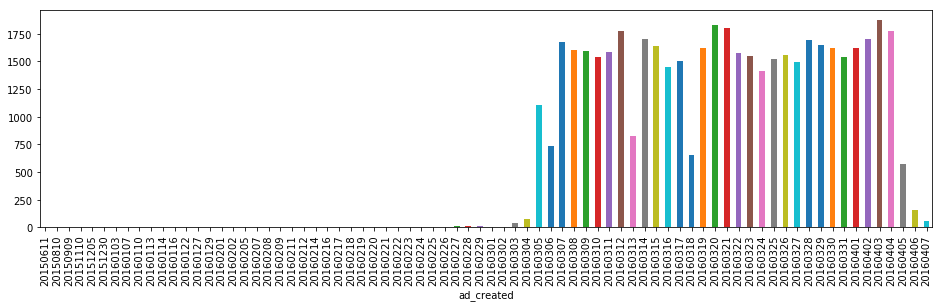

In [19]:
print(autos['ad_created'].unique())
autos['ad_created'].groupby(autos['ad_created']).count().plot(kind='bar', figsize=(16, 4))
plt.show()

***AD CREATED - The above distribbution look like a left skewed ditribution.Which means that most of the ads were created recently.<br>It could be beacuse the cars that were posted earlier (like a month or two ago) would have got sold, hence their ad was pulled down. <br>Leaving only a very small number of ads (of unsold cars) posted from a long period of time.***

**Analyzing `last_seen`**

[20160406 20160315 20160401 20160323 20160407 20160326 20160316 20160402
 20160318 20160405 20160317 20160307 20160328 20160312 20160324 20160404
 20160330 20160331 20160320 20160319 20160403 20160314 20160310 20160327
 20160322 20160329 20160311 20160325 20160313 20160309 20160321 20160306
 20160308 20160305]


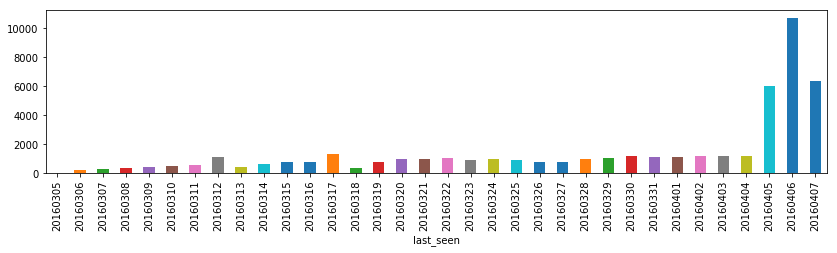

In [20]:
print(autos['last_seen'].unique())
autos['last_seen'].groupby(autos['last_seen']).count().plot(kind='bar', figsize=(14, 3))
plt.show()

***LAST SEEN - Here the distribution is heavily left skewed, with almost 50% of the ads being seen in last 3 days of the dataset.<br>We can give a similar analogy to 'ad_created', older car ads are in less quantity in last seen, as they might be sold already.<br>And, as a consequence most of the last seens ads are of recent sellers, who are interested in selling their cars ASAP.***

### Cleaning, Analyzing `registration_month` and `registration_year`

Removing outliers (if any) from both the columns.

In [21]:
print(autos['registration_month'].unique())
autos['registration_month'].value_counts()      

[ 3  6  7  4  8 12 10  0  9 11  5  2  1]


3     4981
0     4313
6     4255
4     4020
5     4016
7     3842
10    3577
12    3359
9     3318
11    3305
1     3199
8     3115
2     2927
Name: registration_month, dtype: int64

[ 3  6  7  4  8 12 10  9 11  5  2  1]


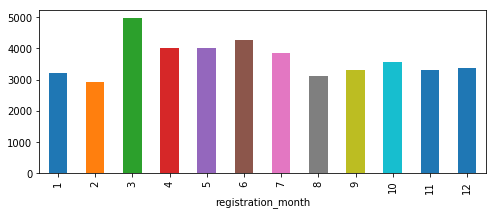

In [22]:
# Observed 0 as an outlier
autos = autos[autos['registration_month']!=0]

print(autos['registration_month'].unique())
autos['registration_month'].groupby(autos['registration_month']).count().plot(kind='bar', figsize=(8, 3))
plt.show()

***Observed outlier for 'Registration month' was 0. Removed it.
And, as expected the ditribution is uniform, since people can buy cars any month of the year.***

In [23]:
print(sorted(autos['registration_year'].unique()))
autos['registration_year'].describe()

[1800, 1927, 1929, 1931, 1934, 1937, 1938, 1939, 1941, 1943, 1948, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2800, 4800, 5000, 6200, 9000]


count    43914.000000
mean      2004.060277
std         44.351169
min       1800.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9000.000000
Name: registration_year, dtype: float64

[1927, 1929, 1931, 1934, 1937, 1938, 1939, 1941, 1943, 1948, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


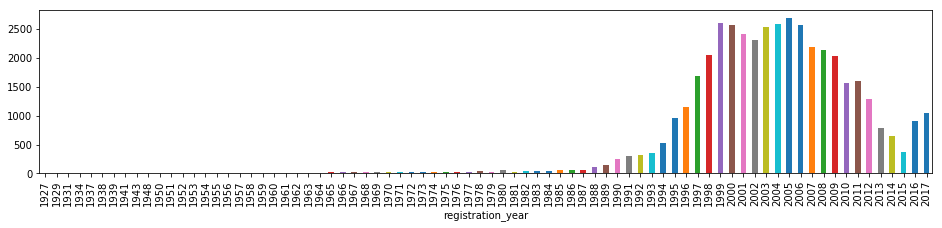

In [24]:
# Here all the values for years before 1900 and after 2017 are invlaid or outliers

autos = autos[autos['registration_year'].between(1900,2017)]

print(sorted(autos['registration_year'].unique()))
autos['registration_year'].groupby(autos['registration_year']).count().plot(kind='bar', figsize=(16, 3))
plt.show()

***Observed outliers for 'Registration year' were values below 1900 and above 2017. Removed those outliers.<br>We can observe that the distribution is left skewed.
Most of the cars were registered between 1998-2008.<br>
It can be explained from the fact that most cars are used for max. 10-15 years and then sell/discard them.***

In [25]:
autos.head()

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,20160326,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,20160326,79588,20160406
1,20160404,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,20160404,71034,20160406
2,20160326,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,20160326,35394,20160406
3,20160312,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,20160312,33729,20160315
4,20160401,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,20160401,39218,20160401


### Exploring Price by Brand

***Selecting Top Brands***

In [26]:
brands = autos['brand'].value_counts(normalize=True)
results = brands >= 0.05

## Finding names of brands wit more then 5% share of ads
top_brands_name = brands[results].index
print(top_brands_name)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


***Mean Price***

In [27]:
brand_mean_price = {}

for car in top_brands_name:
    mean_price = autos.loc[autos['brand']== car,'price'].mean()
    brand_mean_price[car] = round(mean_price, 2)
    
brand_mean_price

{'volkswagen': 5943.71,
 'bmw': 8637.41,
 'opel': 3173.85,
 'mercedes_benz': 8846.68,
 'audi': 9718.9,
 'ford': 4289.74}

***Mean Mileage***

In [28]:
brand_mean_mileage = {}

for car in top_brands_name:
    mean_mileage = autos.loc[autos['brand'] == car, 'odometer_km'].mean()
    brand_mean_mileage[car] = round(mean_mileage, 2)

brand_mean_mileage

{'volkswagen': 128365.67,
 'bmw': 132575.41,
 'opel': 128805.64,
 'mercedes_benz': 131034.56,
 'audi': 128830.76,
 'ford': 123839.23}

***The average prices are as follows:***

|**Brand**|Average Price|
|-|-|
|**Volkswagen:** | 5943.71 |
|**BMW:** | 8637.41|
|**Opel:** | 3173.85|
|**Mercedes Benz:** | 8846.68|
|**Audi:** | 9718.9|
|**Ford:** | 4289.74|

***Here we may notice that the most expensive vehicles are from Audi, BMW and Mercedes.<br>While Ford, Opel are the most economical options, Volkswagen is in between.***

---

***The Average Mileage is as follows***

|**Brand**|Average Price|
|-|-|
|**Volkswagen** | 128365.67|
|**BMW**|132575.41|
|**Opel** | 128805.64|
|**Mercedes Benz**| 131034.56|
|**Audi**|128830.76|
|**Ford**| 123839.23|

***Here, maximum mileage is given by BMW and least by Ford.***

### Storing Aggregate Data in a DataFrame

**First we will convert dictionary into a Series**

In [29]:
bmp_series = pd.Series(brand_mean_price).sort_values(ascending=False)
bmm_series = pd.Series(brand_mean_mileage).sort_values(ascending=False)
print('bmp_series\n')
print(bmp_series,'\n')
print('bmm_series')
bmm_series

bmp_series

audi             9718.90
mercedes_benz    8846.68
bmw              8637.41
volkswagen       5943.71
ford             4289.74
opel             3173.85
dtype: float64 

bmm_series


bmw              132575.41
mercedes_benz    131034.56
audi             128830.76
opel             128805.64
volkswagen       128365.67
ford             123839.23
dtype: float64

**Create a dataframe from the first series object using the dataframe constructor.**

In [30]:
top_brands_df = pd.DataFrame(bmp_series, columns=['mean_price'])
top_brands_df

,mean_price
audi,9718.90
mercedes_benz,8846.68
bmw,8637.41
volkswagen,5943.71
ford,4289.74
opel,3173.85


**Assign the other series as a new column in this dataframe.**

In [31]:
top_brands_df['mean_mileage'] = bmm_series
top_brands_df

,mean_price,mean_mileage
audi,9718.90,128830.76
mercedes_benz,8846.68,131034.56
bmw,8637.41,132575.41
volkswagen,5943.71,128365.67
ford,4289.74,123839.23
opel,3173.85,128805.64


***Here we can observe that car mileage/brand does not vary much as compared to the car prices/brand.<br><hr>While mean price difference for most expensive car brand (Audi) and most economical car brand (Opel) was a gigantic 71%.<br>However, same is not true for mean mileage, with total difference between top mileage giving brand(BMW) & least mileage giving brand(Ford) being mere 7%.***